**1. Importing the required libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline



In [ ]:
df=pd.read_csv('bank.csv')

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**1.2 Checking the types of data and basic summary stats**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**2. Dropping irrelevant columns**

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.Online.sum()

2984

In [ ]:
df.Experience 

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [ ]:
df = df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [ ]:
df = df.dropna()
df.count()


Age                   3645
Income                3645
ZIP Code              3645
Family                3645
CCAvg                 3645
Education             3645
Mortgage              3645
Personal Loan         3645
Securities Account    3645
CD Account            3645
Online                3645
CreditCard            3645
dtype: int64

In [ ]:
print(df.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


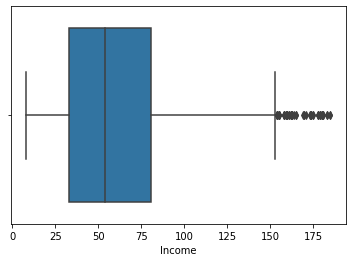

In [ ]:
sns.boxplot(x=df['Income'])

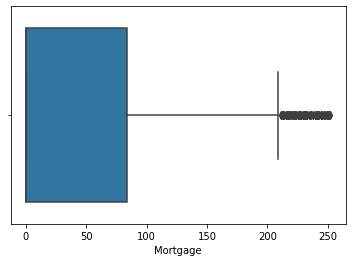

In [ ]:
sns.boxplot(x=df['Mortgage'])

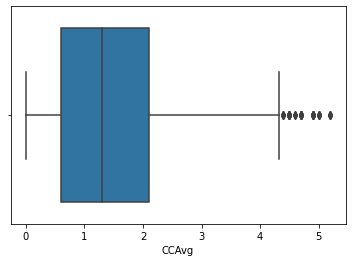

In [ ]:
sns.boxplot(x=df['CCAvg'])

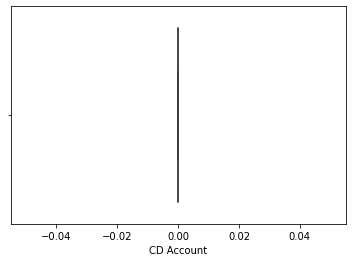

In [ ]:
sns.boxplot(x=df['CD Account'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age                     20.0
Income                  48.0
ZIP Code              2697.0
Family                   3.0
CCAvg                    1.5
Education                2.0
Mortgage                84.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR ))).any(axis = 1)]
df.shape

(3404, 12)

In [ ]:
counts = df['Income'].value_counts()*100/sum(df['Income'].value_counts())
print(counts)

41     2.203290
44     2.173913
38     2.173913
39     2.085781
42     2.056404
         ...   
133    0.088132
143    0.088132
144    0.058754
148    0.029377
153    0.029377
Name: Income, Length: 117, dtype: float64


In [ ]:
popular_labels = counts.index[:10]

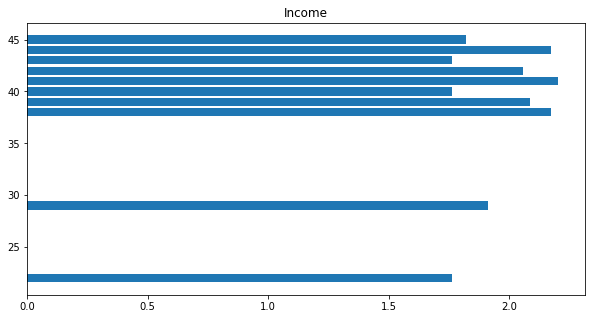

In [ ]:
plt.figure(figsize = (10,5))
plt.barh(popular_labels, width = counts[:10])
plt.title('Income')
plt.show()

In [ ]:
df.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.058807,-0.045114,-0.058023,-0.043526,0.040633,-0.003478,NaN,NaN,NaN,0.023713,-0.002880
Income,-0.058807,1.000000,-0.047663,-0.114746,0.448017,-0.198339,-0.107671,NaN,NaN,NaN,0.017478,0.006809
ZIP Code,-0.045114,-0.047663,1.000000,0.023826,-0.016001,-0.008188,0.002768,NaN,NaN,NaN,0.031581,0.016060
Family,-0.058023,-0.114746,0.023826,1.000000,-0.021320,0.019946,0.020254,NaN,NaN,NaN,0.025435,0.011817
CCAvg,-0.043526,0.448017,-0.016001,-0.021320,1.000000,-0.073160,-0.044919,NaN,NaN,NaN,-0.013359,-0.000139
Education,0.040633,-0.198339,-0.008188,0.019946,-0.073160,1.000000,0.002669,NaN,NaN,NaN,-0.012601,-0.022083
Mortgage,-0.003478,-0.107671,0.002768,0.020254,-0.044919,0.002669,1.000000,NaN,NaN,NaN,-0.026297,0.000527
Personal Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


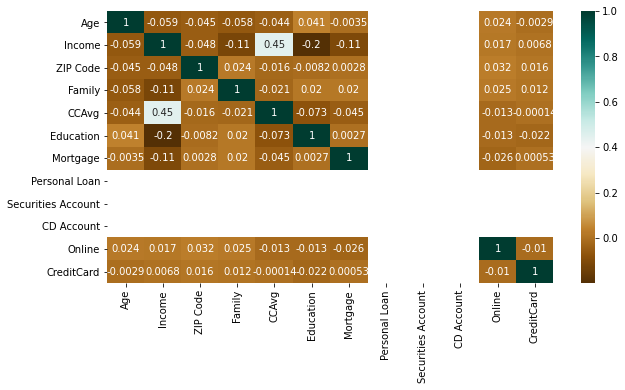

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap = "BrBG",annot = True)

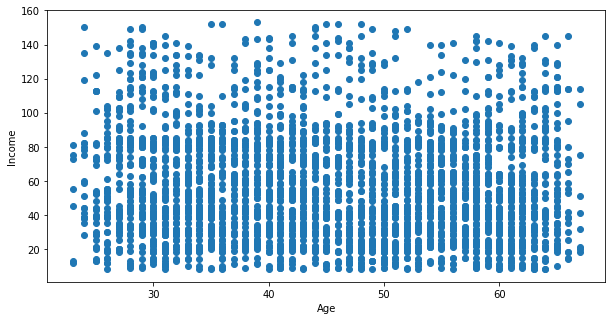

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3404 entries, 2 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3404 non-null   int64  
 1   Income              3404 non-null   int64  
 2   ZIP Code            3404 non-null   int64  
 3   Family              3404 non-null   int64  
 4   CCAvg               3404 non-null   float64
 5   Education           3404 non-null   int64  
 6   Mortgage            3404 non-null   int64  
 7   Personal Loan       3404 non-null   int64  
 8   Securities Account  3404 non-null   int64  
 9   CD Account          3404 non-null   int64  
 10  Online              3404 non-null   int64  
 11  CreditCard          3404 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 345.7 KB


Text(0.5, 0, 'Age')

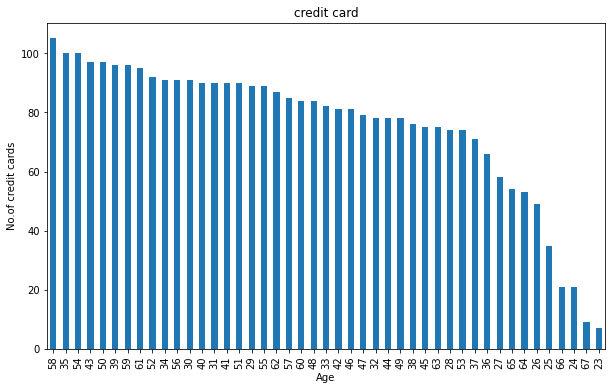

In [ ]:
df['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

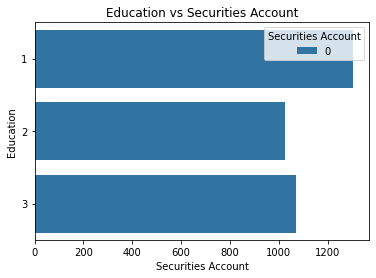

In [ ]:
sns.countplot(y='Education', data = df , hue = 'Securities Account')
plt.title('Education vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3404 entries, 2 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3404 non-null   int64  
 1   Income              3404 non-null   int64  
 2   ZIP Code            3404 non-null   int64  
 3   Family              3404 non-null   int64  
 4   CCAvg               3404 non-null   float64
 5   Education           3404 non-null   int64  
 6   Mortgage            3404 non-null   int64  
 7   Personal Loan       3404 non-null   int64  
 8   Securities Account  3404 non-null   int64  
 9   CD Account          3404 non-null   int64  
 10  Online              3404 non-null   int64  
 11  CreditCard          3404 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 505.7 KB


In [ ]:
x=df[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=df['Personal Loan'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2382, 6) (1022, 6) (2382, 1) (1022, 1)


#remaining code can be checked here
https://colab.research.google.com/drive/1nC2NaoVPEW8Y117RkCzuFYziGKVmOn85#scrollTo=l3hmB8uOwzkp
